# Data

In [1]:
!unzip /content/drive/MyDrive/Colab_Notebooks/interview_ass/supervisely/generated_data_v2.zip -d generated_data

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: generated_data/generated_data_v2/Apple F/annot/apple_656.png  
  inflating: generated_data/generated_data_v2/Apple F/annot/apple_657.png  
  inflating: generated_data/generated_data_v2/Apple F/annot/apple_658.png  
  inflating: generated_data/generated_data_v2/Apple F/annot/apple_659.png  
  inflating: generated_data/generated_data_v2/Apple F/annot/apple_66.png  
  inflating: generated_data/generated_data_v2/Apple F/annot/apple_660.png  
  inflating: generated_data/generated_data_v2/Apple F/annot/apple_661.png  
  inflating: generated_data/generated_data_v2/Apple F/annot/apple_662.png  
  inflating: generated_data/generated_data_v2/Apple F/annot/apple_663.png  
  inflating: generated_data/generated_data_v2/Apple F/annot/apple_664.png  
  inflating: generated_data/generated_data_v2/Apple F/annot/apple_665.png  
  inflating: generated_data/generated_data_v2/Apple F/annot/apple_666.png  
  inflating: generate

In [2]:
!unzip /content/drive/MyDrive/Colab_Notebooks/interview_ass/supervisely/assets.zip -d assets

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: assets/assets/Apple B/Red Applee30 - Copy.png  
  inflating: assets/assets/Apple B/Red Applee30.png  
  inflating: assets/assets/Apple B/Red Applee31 - Copy.png  
  inflating: assets/assets/Apple B/Red Applee31.png  
  inflating: assets/assets/Apple B/Red Applee32 - Copy.png  
  inflating: assets/assets/Apple B/Red Applee32.png  
  inflating: assets/assets/Apple B/Red Applee33 - Copy.png  
  inflating: assets/assets/Apple B/Red Applee33.png  
  inflating: assets/assets/Apple B/Red Applee34 - Copy.png  
  inflating: assets/assets/Apple B/Red Applee34.png  
  inflating: assets/assets/Apple B/Red Applee35 - Copy.png  
  inflating: assets/assets/Apple B/Red Applee35.png  
  inflating: assets/assets/Apple B/Red Applee36 - Copy.png  
  inflating: assets/assets/Apple B/Red Applee36.png  
  inflating: assets/assets/Apple B/Red Applee37 - Copy.png  
  inflating: assets/assets/Apple B/Red Applee37.png  
  inflating:

# Train

In [3]:
%load_ext autoreload
%autoreload 2

In [6]:
import sys
import torch
import random
import numpy as np
from torch.nn import CrossEntropyLoss
from torch import device as Device
from torch.cuda import is_available
from torch.utils.data import DataLoader
from torch.optim import Adam
from torchvision import transforms

from model.dataset import AppleDataset
from model.classification_model import ClassificationModel
from model.train import train, test_cycle


LABEL_ENC = {
    "Apple A": 0,
    "Apple B": 1,
    "Apple C": 2,
    "Apple D": 3,
    "Apple E": 4,
    "Apple F": 5,
}


def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)


def main():
    g = torch.Generator()
    g.manual_seed(0)
    size = (256, 256)
    transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Resize(size),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ],
    )
    train_dataset = AppleDataset(
        "/content/generated_data/generated_data",
        LABEL_ENC,
        transform=transform,
    )
    val_dataset = AppleDataset(
        "/content/generated_data/generated_test_data",
        LABEL_ENC,
        transform=transform,
    )
    test_dataset = AppleDataset(
        "/content/assets/assets",
        LABEL_ENC,
        transform=transform,
        with_annot=False,
    )

    train_loader = DataLoader(
        train_dataset,
        32,
        shuffle=True,
        worker_init_fn=seed_worker,
        generator=g,
    )
    val_loader = DataLoader(val_dataset, 64, shuffle=False)
    test_loader = DataLoader(test_dataset, 64, shuffle=False)

    device = Device('cuda' if is_available() else 'cpu')
    model = ClassificationModel(size, num_of_classes=6)
    model.to(device)
    optim = Adam(model.parameters(), lr=1e-4)
    train(model, optim, device, train_loader, val_loader, epochs=5, verbose=5)
    test_cycle(
        model, CrossEntropyLoss(), test_loader, device, report=True,
    )
    return model

In [8]:
model = main()

Start Training


100%|██████████| 188/188 [00:44<00:00,  4.23it/s]

Epoch #1 | Loss: 1.2878967460165633



100%|██████████| 29/29 [00:08<00:00,  3.35it/s]

Test Loss: 0.7175080344594759



100%|██████████| 188/188 [00:37<00:00,  5.04it/s]

Epoch #2 | Loss: 0.611473179640288



100%|██████████| 29/29 [00:07<00:00,  3.84it/s]

Test Loss: 0.4284345583412154



100%|██████████| 188/188 [00:37<00:00,  5.06it/s]

Epoch #3 | Loss: 0.28189223023884474



100%|██████████| 29/29 [00:08<00:00,  3.41it/s]

Test Loss: 0.218657074945754



100%|██████████| 188/188 [00:36<00:00,  5.11it/s]

Epoch #4 | Loss: 0.12365867413501157



100%|██████████| 29/29 [00:08<00:00,  3.54it/s]

Test Loss: 0.1703459905372162



100%|██████████| 188/188 [00:37<00:00,  5.05it/s]

Epoch #5 | Loss: 0.061259989058252105



100%|██████████| 29/29 [00:07<00:00,  3.74it/s]

Test Loss: 0.2826504826963205
              precision    recall  f1-score   support

           0       0.91      0.66      0.76       300
           1       1.00      0.92      0.96       300
           2       0.73      0.99      0.84       300
           3       1.00      0.97      0.99       300
           4       0.96      0.98      0.97       300
           5       0.98      0.98      0.98       300

    accuracy                           0.92      1800
   macro avg       0.93      0.92      0.92      1800
weighted avg       0.93      0.92      0.92      1800



100%|██████████| 97/97 [00:41<00:00,  2.32it/s]

Test Loss: 3.0174814008762003
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       692
           1       0.36      0.98      0.53       740
           2       0.24      0.29      0.27      1002
           3       0.98      0.20      0.33      1033
           4       0.40      0.16      0.22       664
           5       0.74      0.83      0.78      2030

    accuracy                           0.49      6161
   macro avg       0.45      0.41      0.36      6161
weighted avg       0.53      0.49      0.45      6161


In [40]:
transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Resize((256, 256)),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ],
)
test_dataset = AppleDataset(
        "/content/assets/assets",
        LABEL_ENC,
        transform=transform,
        with_annot=False,
)
test_loader = DataLoader(test_dataset, 64, shuffle=False)

In [43]:
from tqdm.notebook import tqdm

model.eval()
targets = []
preds = []
for batch, target in tqdm(test_loader):
    pred = model(batch.cuda()).detach().cpu()
    preds.extend(np.argmax(pred, axis=1))
    targets.extend(target)

  0%|          | 0/97 [00:00<?, ?it/s]

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(targets, preds)

[]

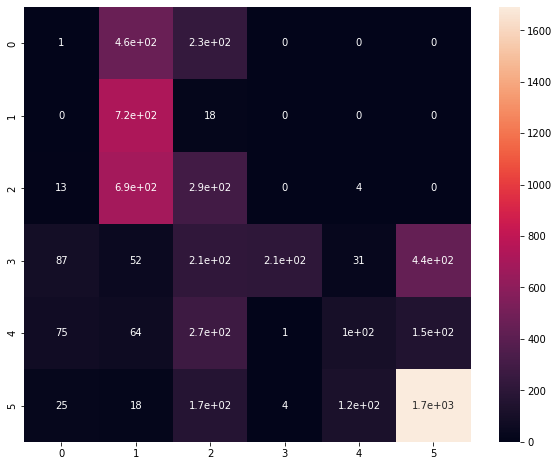

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True)
plt.plot()